## The draining cup problem

In this notebook we will be modelling a draining cup. We assume the cup is shaped like a [conical frustrum](http://mathworld.wolfram.com/ConicalFrustum.html) or truncated cone:

![](cup.png)

$D$ and $d$ are the top and bottom diameters of the cup, $H$ is the side length between the diameters, $d_h$ is the hole diameter. We also define $H'$ as the vertical height of the cup and $h$ as the vertical height (or level) of the liquid in the cup

### Volume-height relationship

Let's work out the relationship between the volume of water and the level in the cup by integrating the area:

$$V = \int_0^h A(h) dh$$

In [ ]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate
sympy.init_printing()

In [ ]:
h, H, d,D = sympy.symbols('h, H, d,D')

In [ ]:
r = d/2
R = D/2
Hprime = sympy.sqrt(H**2 - (R - r)**2)
Hprime

In [ ]:
radius = r + h/Hprime*(R - r)

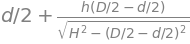

In [5]:
radius

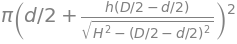

In [6]:
A = sympy.pi*radius**2
A

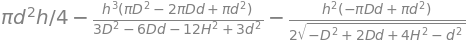

In [9]:
V = sympy.integrate(A,(h,0,h))
V

$$\frac{dV}{dt} = -F_{out}$$
$$F_{out} = k * h$$
$$h = f(V)$$

In [ ]:
# Vsymbol = sympy.Symbol('V')

# h_func = sympy.solve(V - Vsymbol,h)[0]

In [10]:
Vfunc = sympy.lambdify([h,H,d,D],V)

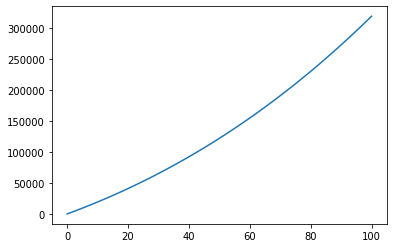

In [13]:
hlist = np.linspace(0,100,101)
Vlist = np.zeros_like(hlist)

Dval = 80
dval = 48
Hval = 107
k = 42

for i,hval in enumerate(hlist):
    Vlist[i] = Vfunc(hval,Hval,dval,Dval)
    
plt.plot(hlist,Vlist)
plt.show()

In [18]:

Dval = 80
dval = 48
Hval = 107
k = 42

def func(t,V):
    h = np.interp(V,Vlist,hlist)
    Fout = k*h
    dVdt = -Fout
    return dVdt

sol = scipy.integrate.solve_ivp(func, (0,1000),[300000],max_step = 1)
sol    

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.36765921e-01, 1.23676592e+00, ...,
       9.98236766e+02, 9.99236766e+02, 1.00000000e+03])
 t_events: None
        y: array([[3.00000000e+05, 2.99046371e+05, 2.95041100e+05, ...,
        6.71669045e-05, 6.56354653e-05, 6.44901568e-05]])
 y_events: None

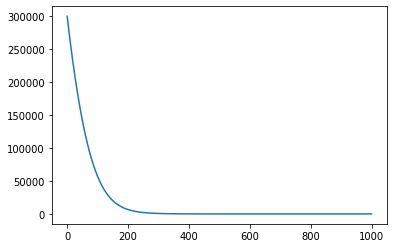

In [19]:
plt.plot(sol.t,sol.y.T)
plt.show()